In [1]:
#https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download
#louis boulas 6/2023

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv(r'E:\CS_DS_Projects\Datasets\AirlinePassengerSatisfaction\train.csv')
df_test = pd.read_csv(r'E:\CS_DS_Projects\Datasets\AirlinePassengerSatisfaction\test.csv')

# Data Exploration and Cleaning

In [4]:
pd.set_option('display.max_columns', None)
df1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df1.shape

(103904, 25)

In [6]:
df1 = df1.drop(['Unnamed: 0','id'], axis=1)
df_test = df_test.drop(['Unnamed: 0', 'id'], axis=1)


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
#Study of Characteristics
#describing columns
for column in df1:
    print(df1[column].describe())

count     103904
unique         2
top       Female
freq       52727
Name: Gender, dtype: object
count             103904
unique                 2
top       Loyal Customer
freq               84923
Name: Customer Type, dtype: object
count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64
count              103904
unique                  2
top       Business travel
freq                71655
Name: Type of Travel, dtype: object
count       103904
unique           3
top       Business
freq         49665
Name: Class, dtype: object
count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64
count    103904.000000
mean          2.729683
std           1.327829
min           0.000000
25

In [9]:
#checking for null values
df1.isnull().sum() 

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Since there is less than 1% of the data that has null values and they are all located in Arrival Delay, I am opting to drop those rows. Another strategy would be to replace the null values with the median of the column.

In [11]:
df1 = df1.dropna()
df_test =  df_test.dropna()

In [12]:
df1.isnull().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
satisfaction                         False
dtype: bool

In [13]:
df1 = df1.rename(columns={"Departure Delay in Minutes":"Departure Delay", "Arrival Delay in Minutes":"Arrival Delay", "Leg room service":"Leg Room","Inflight wifi service":"Wifi"})
df_test = df_test.rename(columns={"Departure Delay in Minutes":"Departure Delay", "Arrival Delay in Minutes":"Arrival Delay", "Leg room service":"Leg Room","Inflight wifi service":"Wifi"})

### Finding and Cleaning Data Outliers

In [14]:
def plot(df,whis):
    for column in df:
        df[[column]].plot.box(figsize=(10,5), title= column, whis = whis)

In [15]:
#picking out numerical columns for box plots
df2 = df1.drop(['Gender','Customer Type', 'Type of Travel','Class','satisfaction'],axis=1)

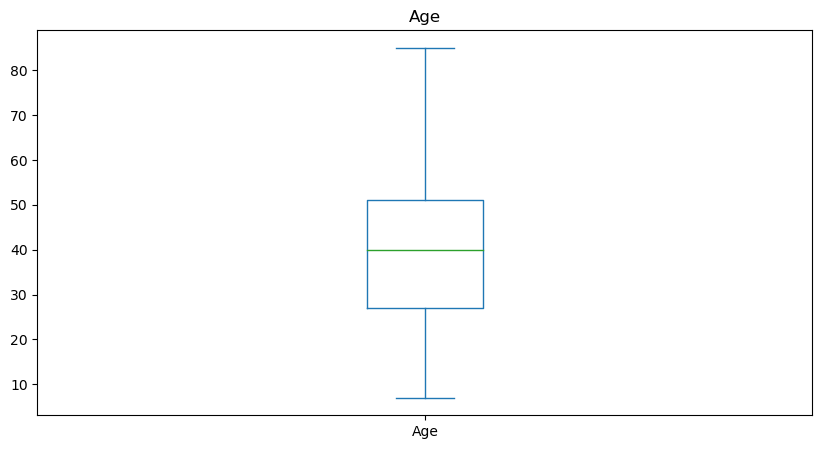

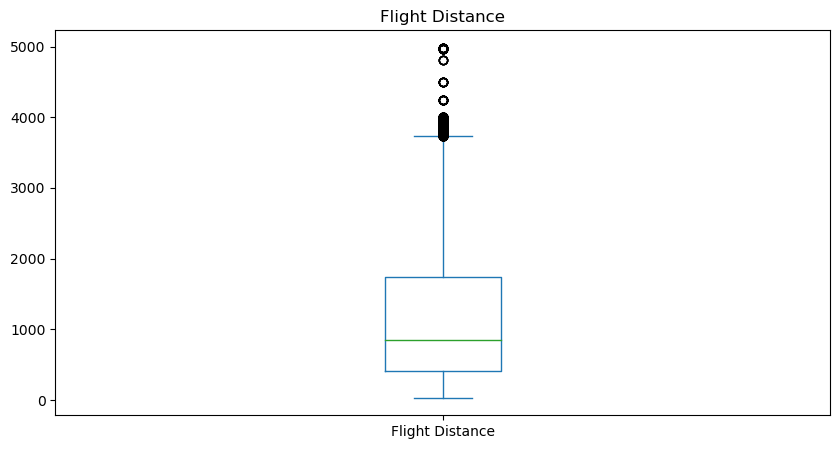

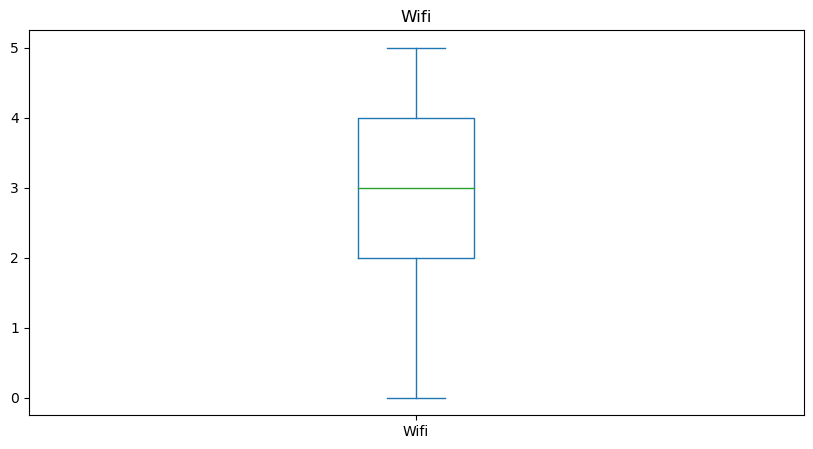

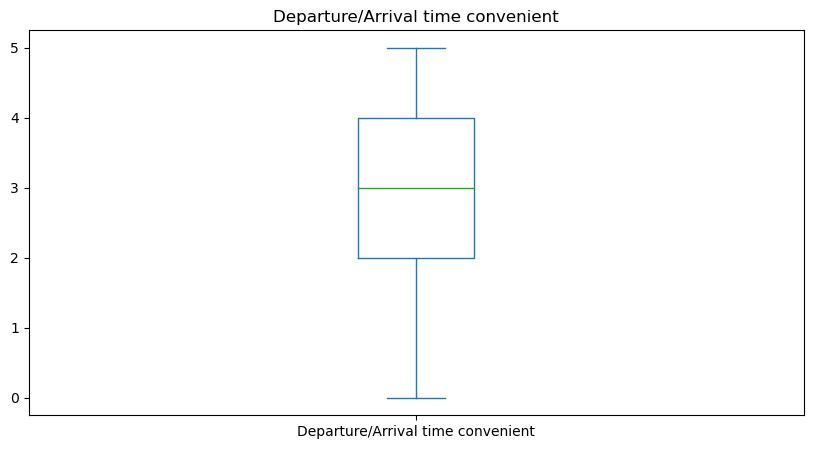

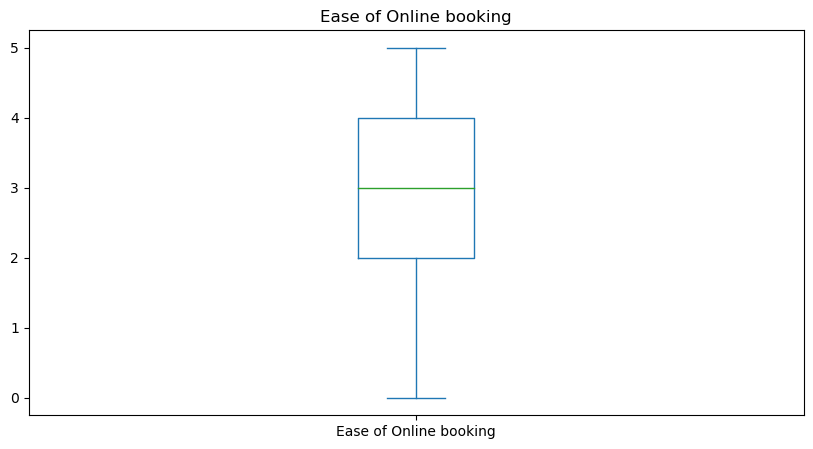

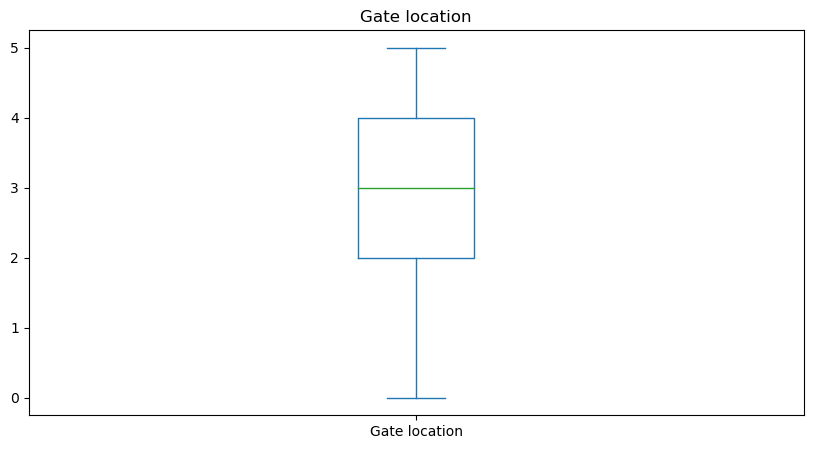

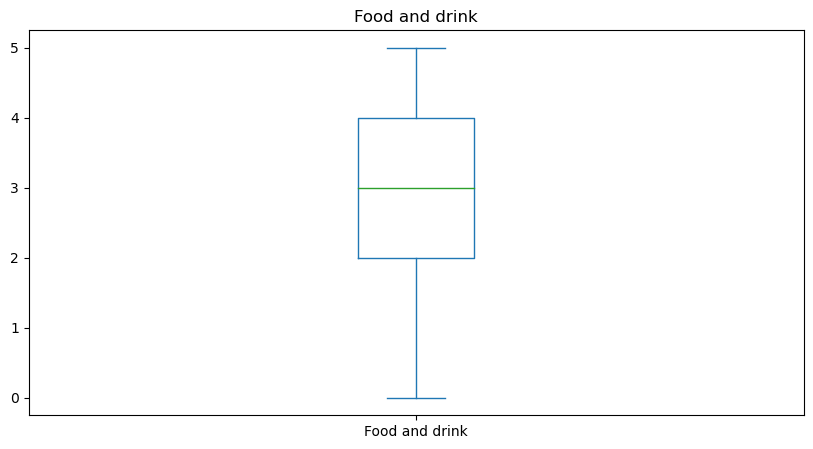

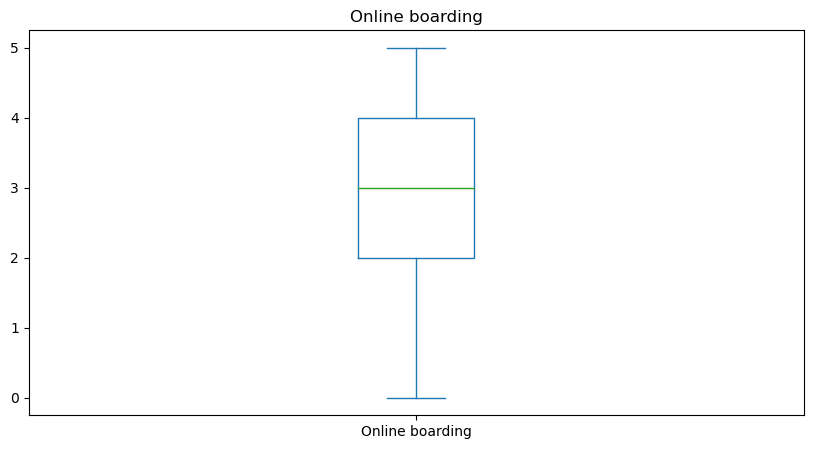

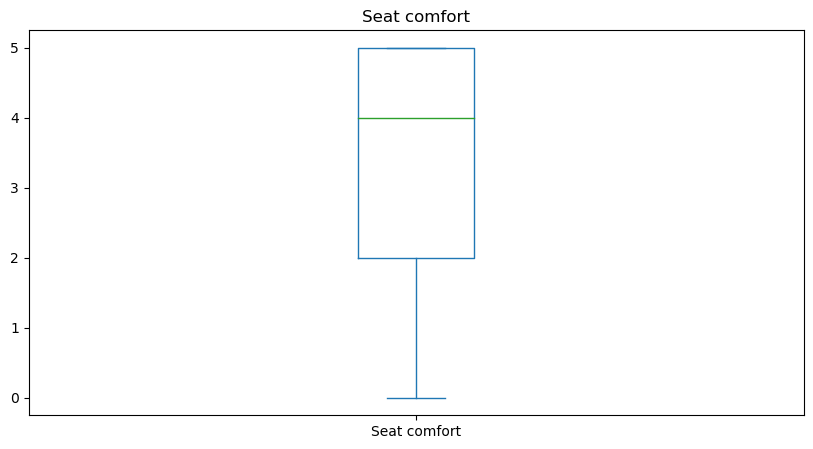

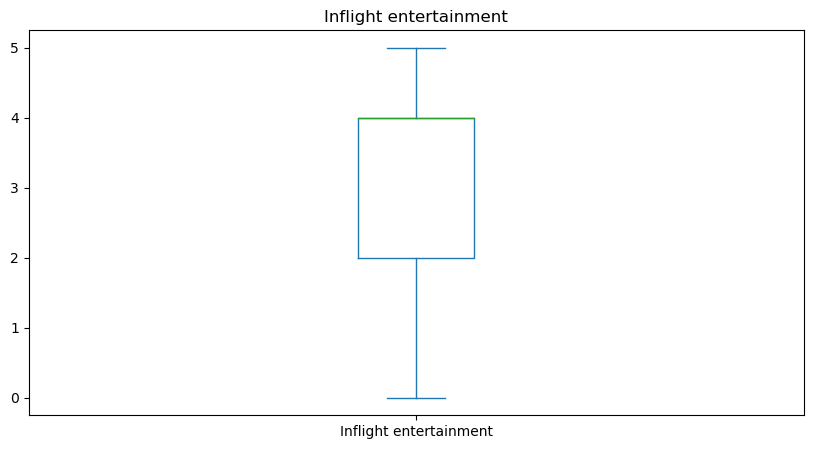

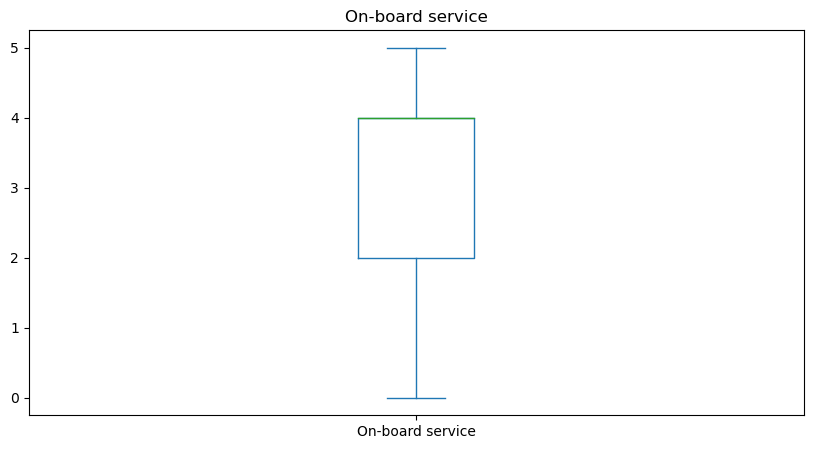

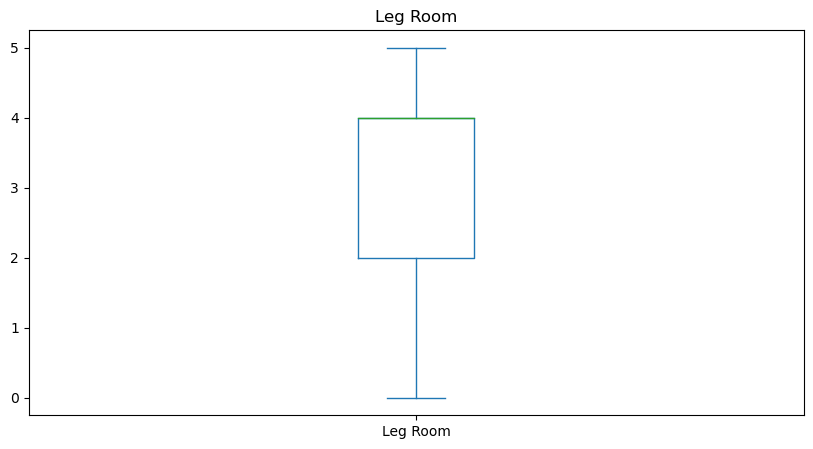

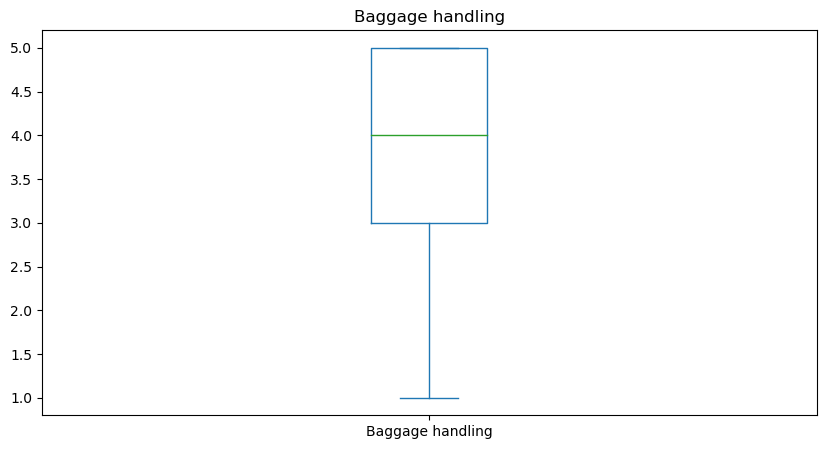

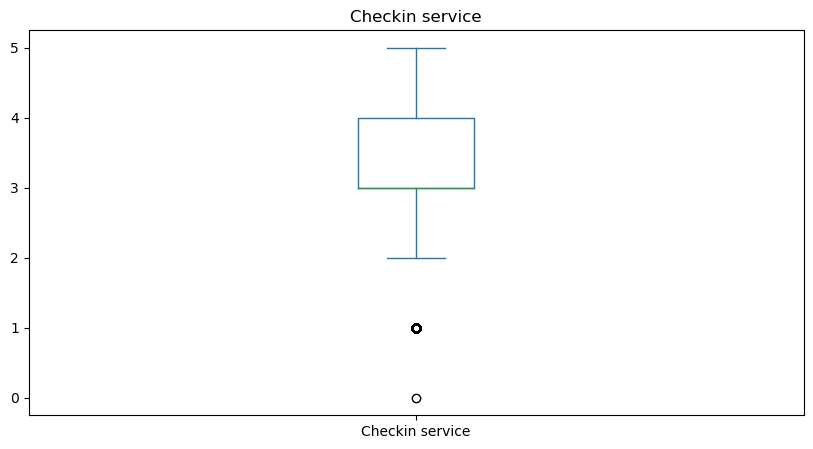

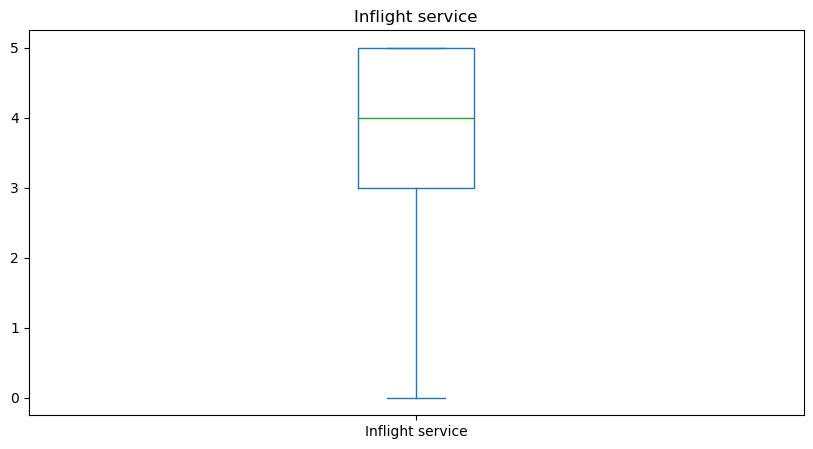

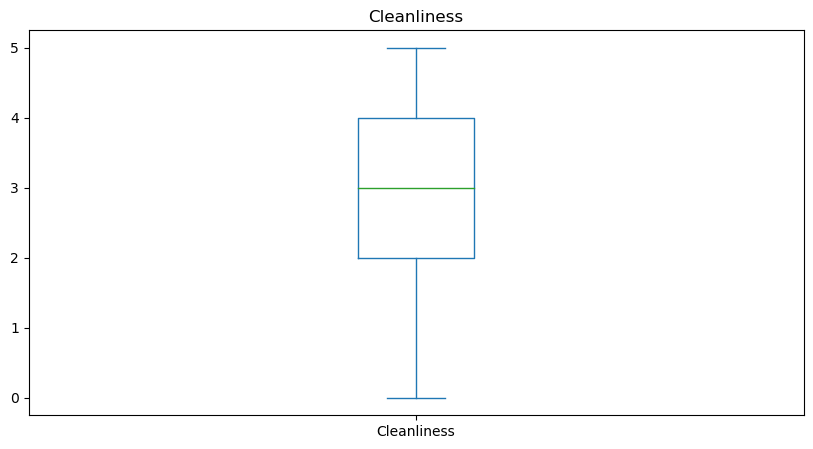

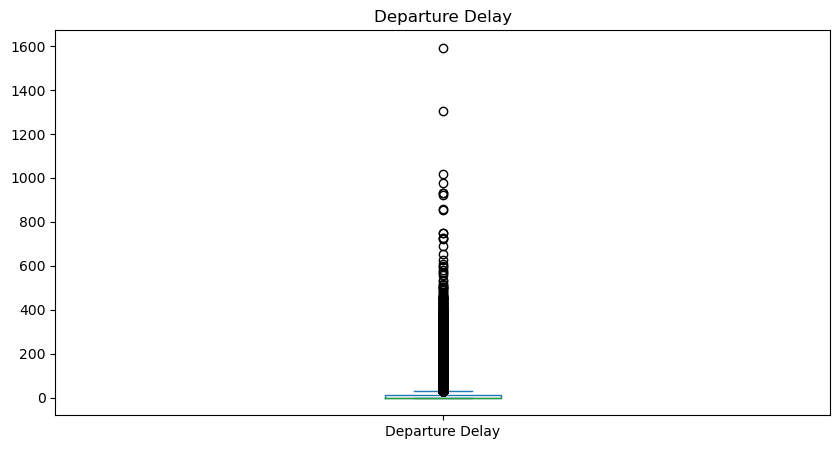

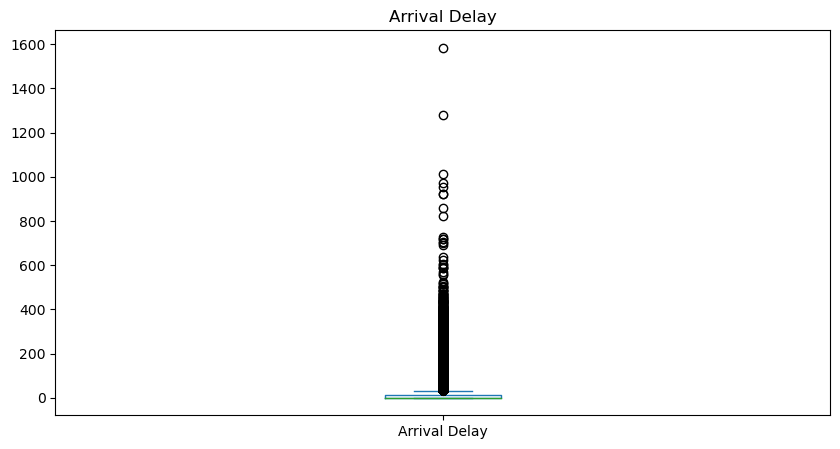

In [16]:
plot(df2,1.5)

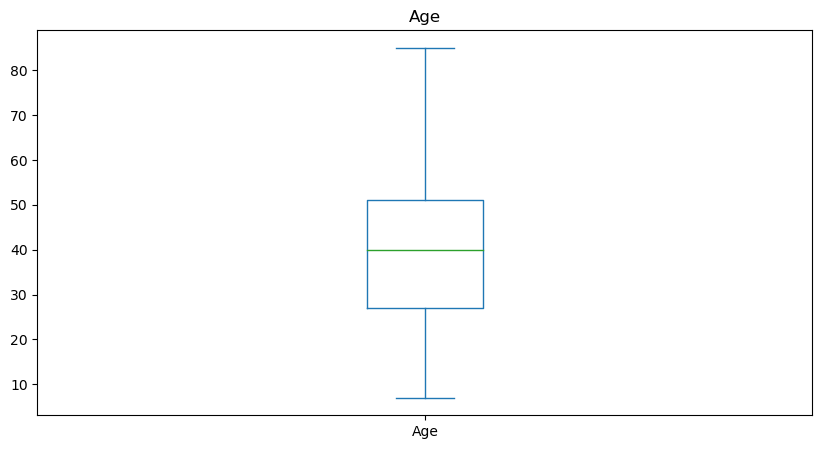

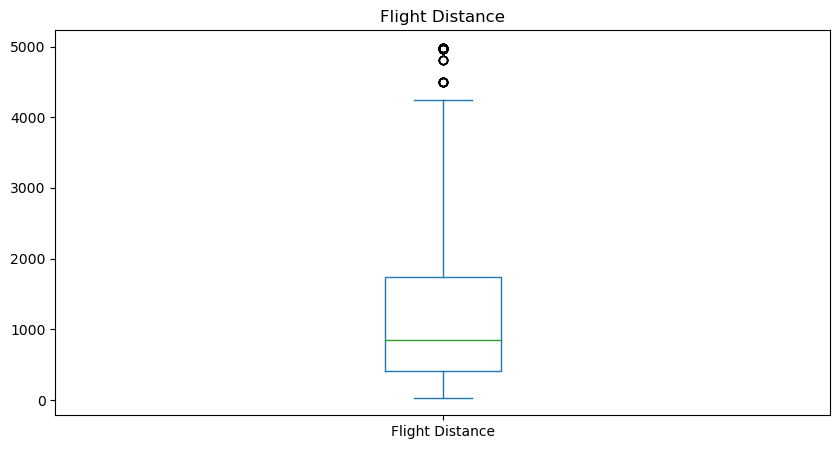

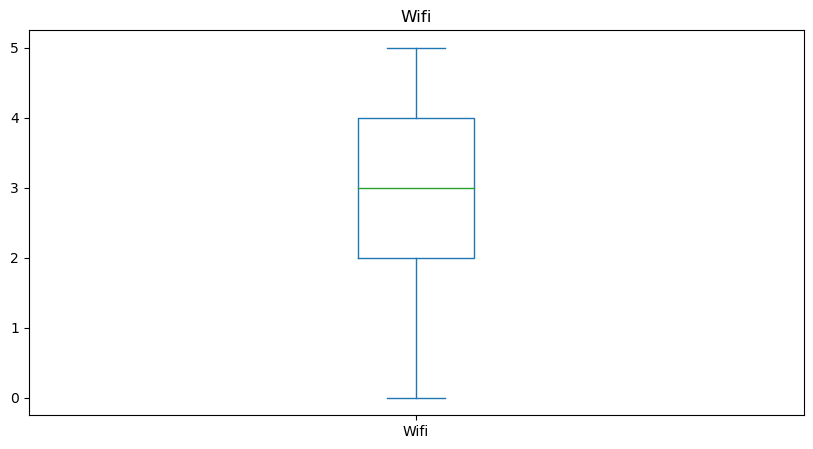

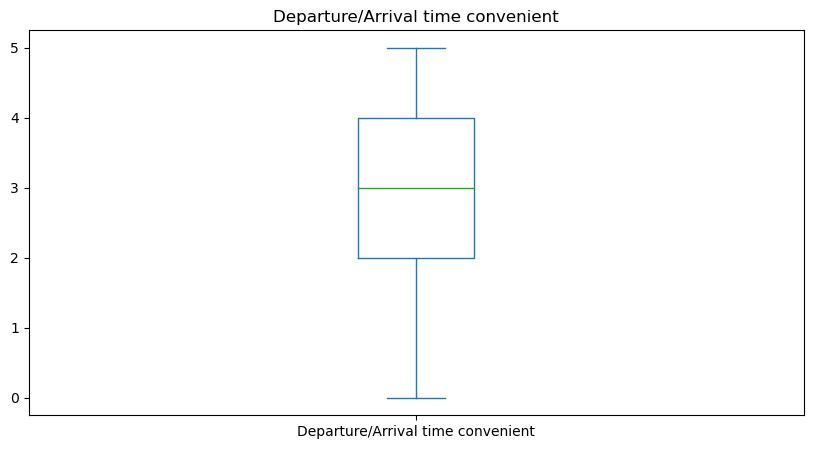

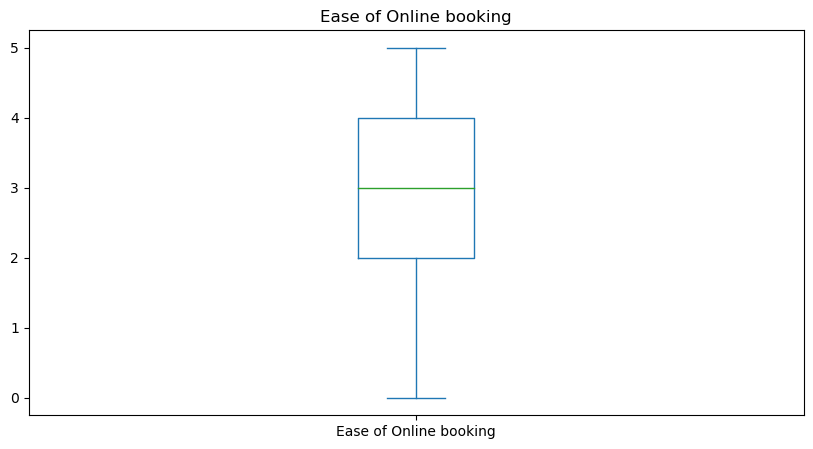

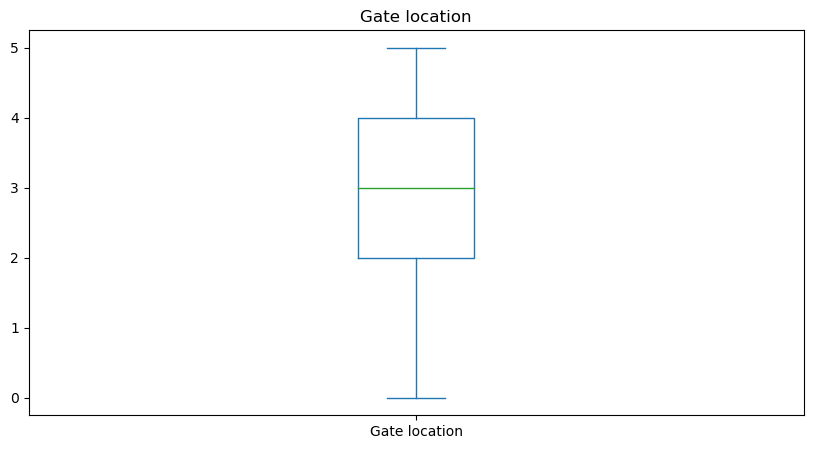

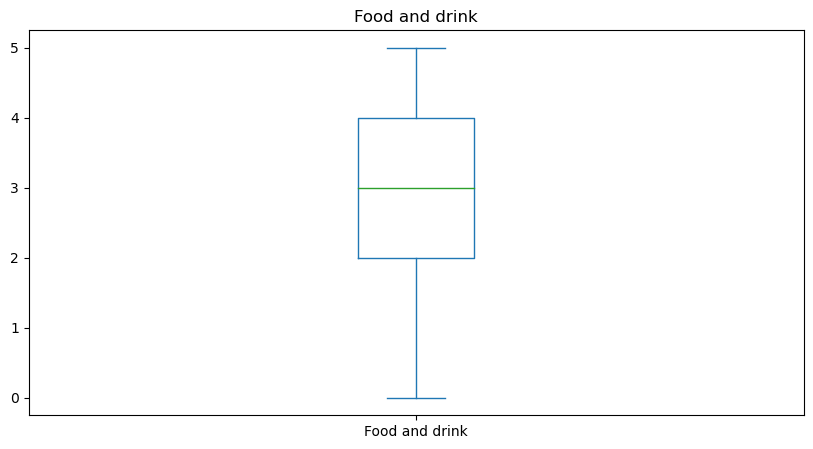

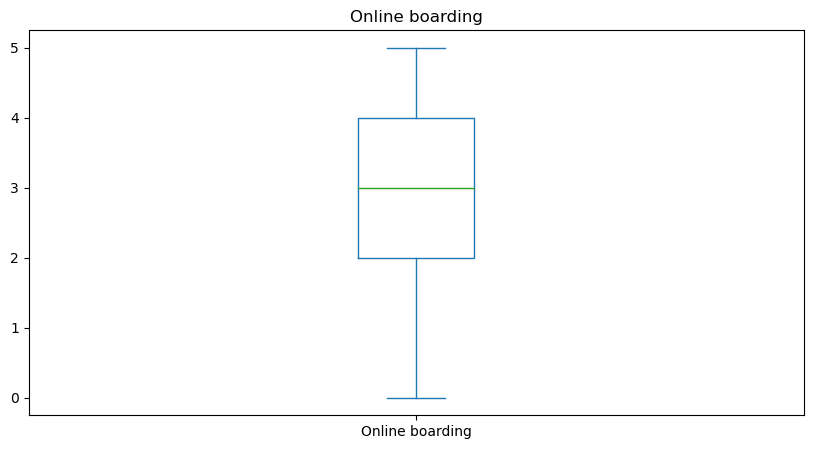

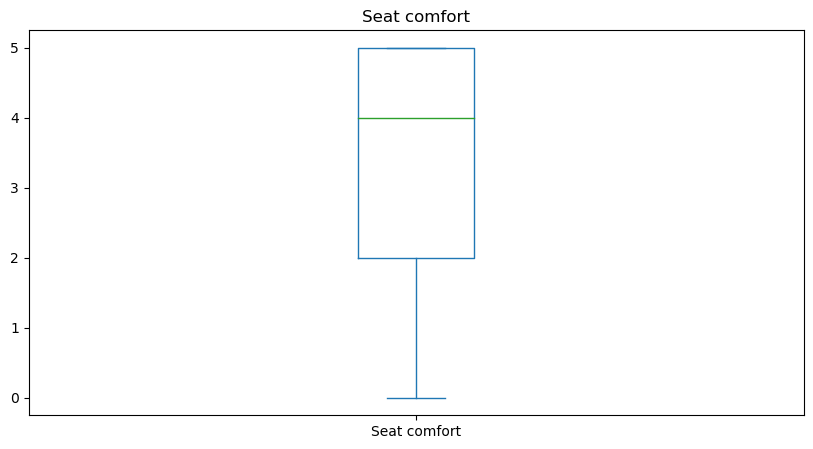

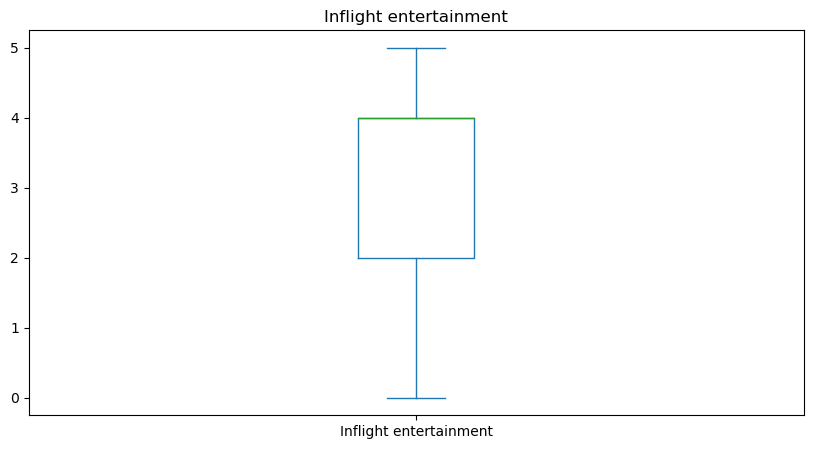

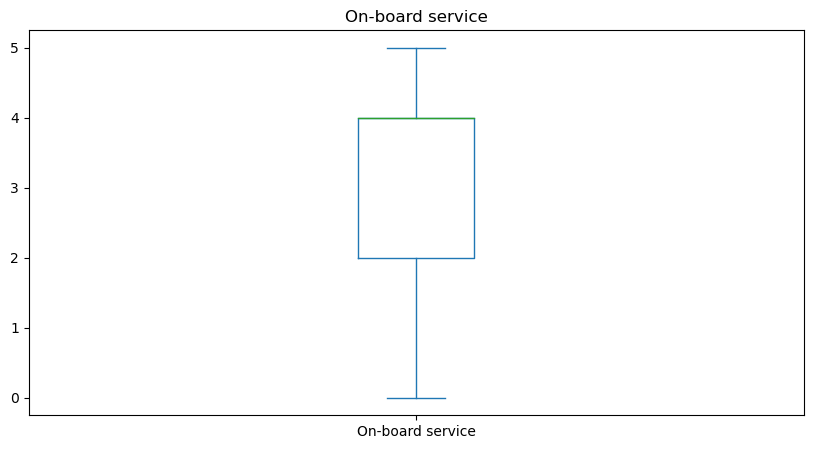

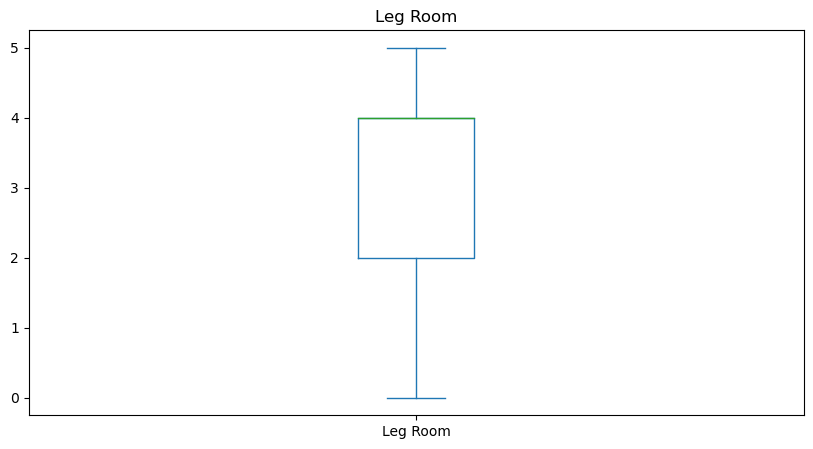

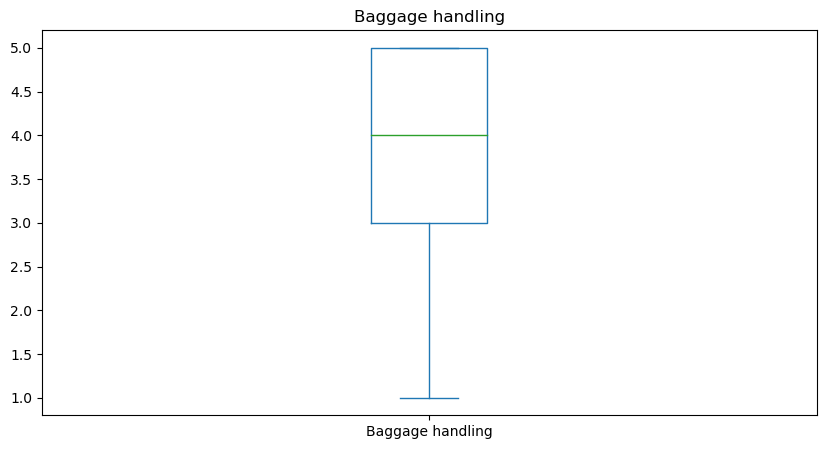

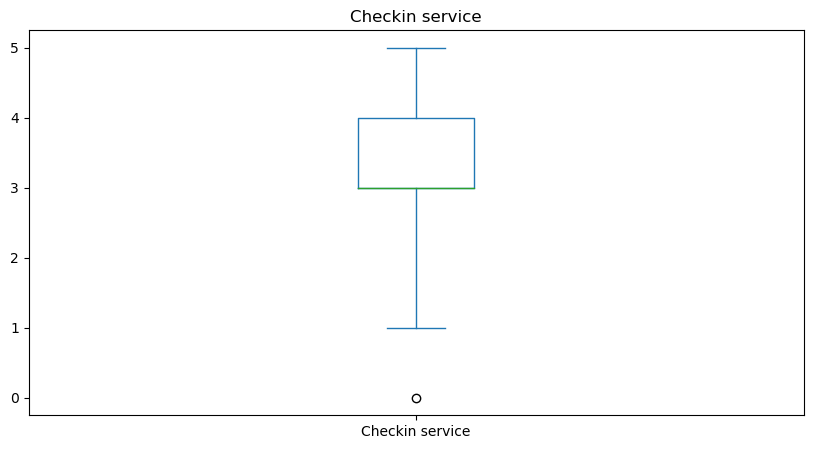

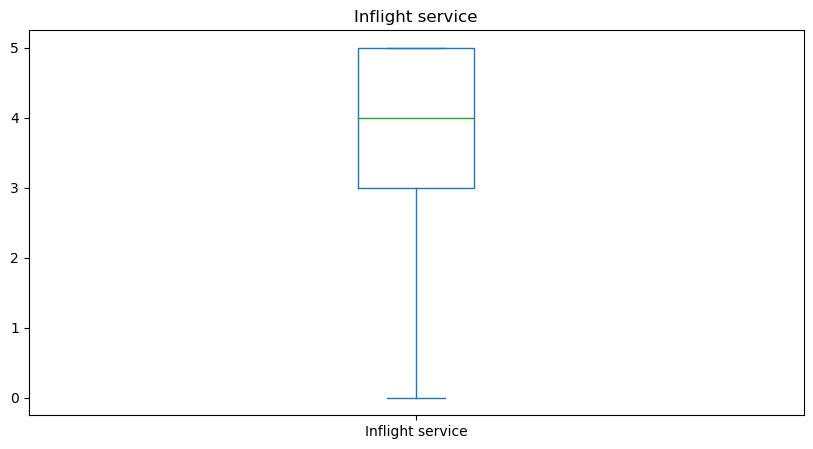

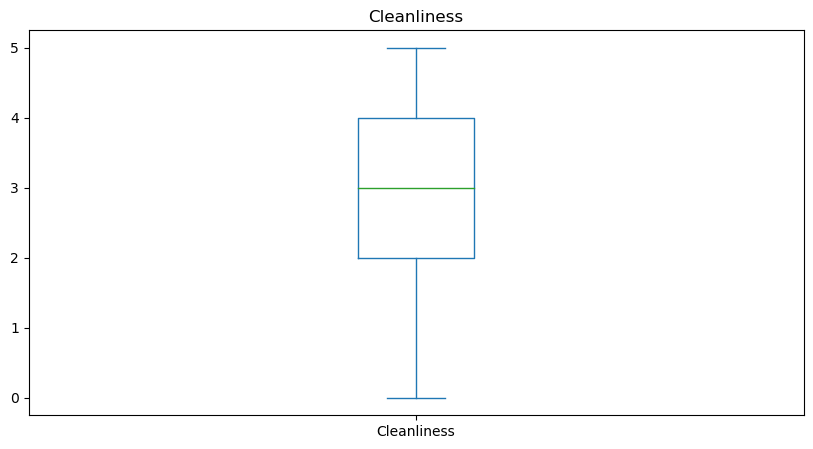

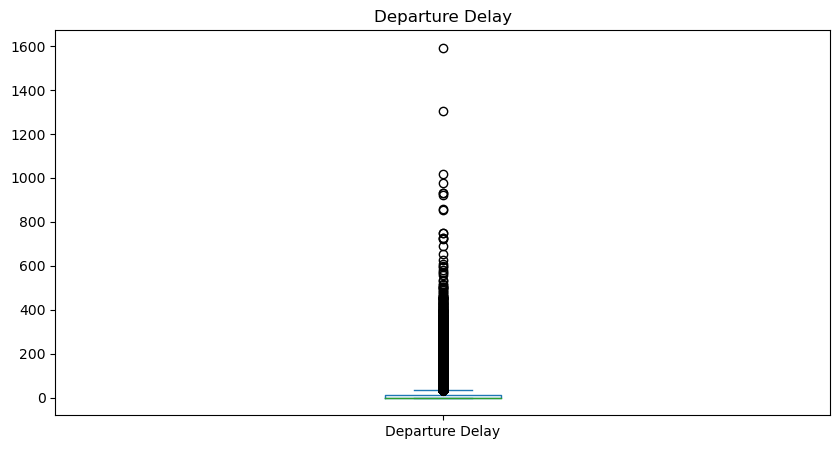

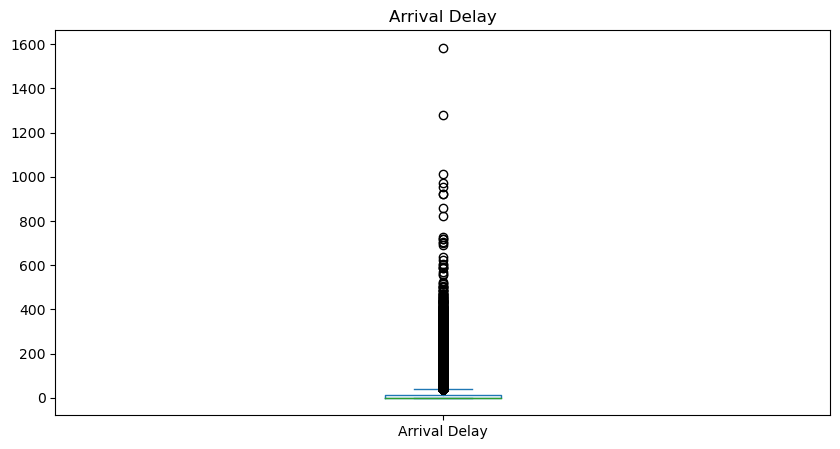

In [17]:
#outliers found in: flight distance, checkin service, departure delay, arrival delay
plot(df2,2)

In [18]:
#IQR bounds function
def check_outliers(x,factor):
    q25 = x.quantile(.25)
    q75 = x.quantile(.75)
    IQR = q75-q25
    l = q25 - IQR*factor
    u = q75 + IQR*factor
    return l, u

In [19]:
lower, upper = check_outliers(df2['Checkin service'],1.5)
print(f'lower = {lower}, upper={upper}')

lower = 1.5, upper=5.5


<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

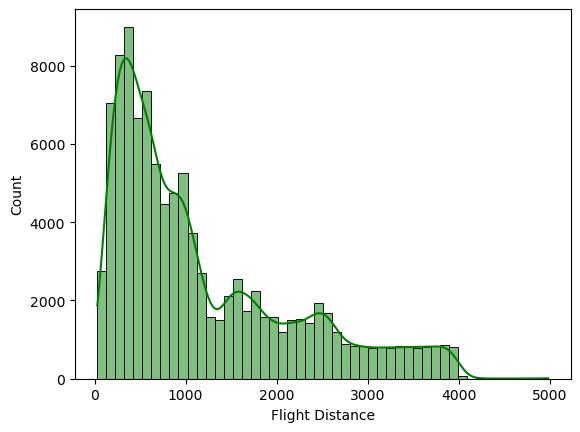

In [20]:
sns.histplot(df1['Flight Distance'], bins=50, color='green', kde =True)

In [21]:
df1['ew_bin'] = pd.cut(df1['Flight Distance'], 3)
df1['ew_bin'].value_counts().sort_index()

(26.048, 1681.667]      76511
(1681.667, 3332.333]    21488
(3332.333, 4983.0]       5595
Name: ew_bin, dtype: int64

In [22]:
df1['q_bin'] = pd.qcut(df1['Flight Distance'], 3)
df1['q_bin'].value_counts().sort_index()

(30.999, 537.0]     34536
(537.0, 1325.0]     34578
(1325.0, 4983.0]    34480
Name: q_bin, dtype: int64

Going to bin flight distance values into the following categories:
short haul <700mi, medium haul 700mi - 3000mi, long haul >3000mi

source: __[United definition from wikipedia](https://en.wikipedia.org/wiki/Flight_length#:~:text=American%20Airlines%20defines%20short%2D%2F,New%20York%E2%80%93San%20Francisco%20routes)__

In [23]:
df1['FD_bin'] = pd.cut(x=df1['Flight Distance'], bins=[0,700,3000,5000], labels=['short haul', 'medium haul', 'long haul'])
df1 = df1.drop(['Flight Distance'], axis=1)

df_test['FD_bin'] = pd.cut(x=df_test['Flight Distance'], bins=[0,700,3000,5000],labels=['short haul', 'medium haul',
                                                                                        'long haul'])
df_test = df_test.drop(['Flight Distance'], axis=1)

In [24]:
df1['FD_bin'].value_counts().sort_index()

short haul     45864
medium haul    49482
long haul       8248
Name: FD_bin, dtype: int64

In [25]:
df1.drop(['ew_bin','q_bin'], axis=1)

,Gender,Customer Type,Age,Type of Travel,Class,Wifi,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg Room,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay,Arrival Delay,satisfaction,FD_bin
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,short haul
1,Male,disloyal Customer,25,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,short haul
2,Female,Loyal Customer,26,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,medium haul
3,Female,Loyal Customer,25,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,short haul
4,Male,Loyal Customer,61,Business travel,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,short haul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied,short haul
103900,Male,Loyal Customer,49,Business travel,Business,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied,medium haul
103901,Male,disloyal Customer,30,Business travel,Business,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied,medium haul
103902,Female,disloyal Customer,22,Business travel,Eco,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied,medium haul


Taking a deeper look into Departure Delay and Arrival Delay

<AxesSubplot:xlabel='Departure Delay', ylabel='Count'>

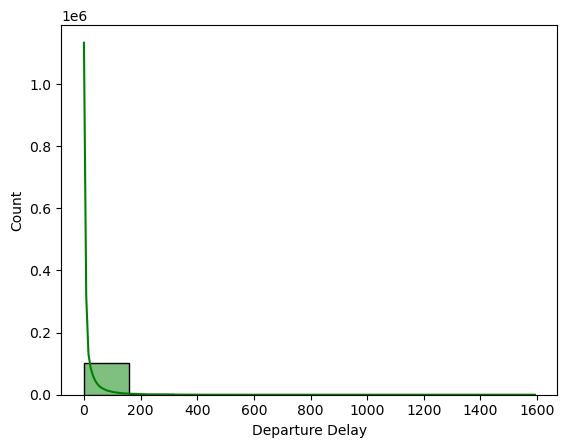

In [26]:
#DEPARTURE/ARRIVAL DELAY
sns.histplot(df1['Departure Delay'], bins=10, color='green', kde =True)

<AxesSubplot:xlabel='Arrival Delay', ylabel='Count'>

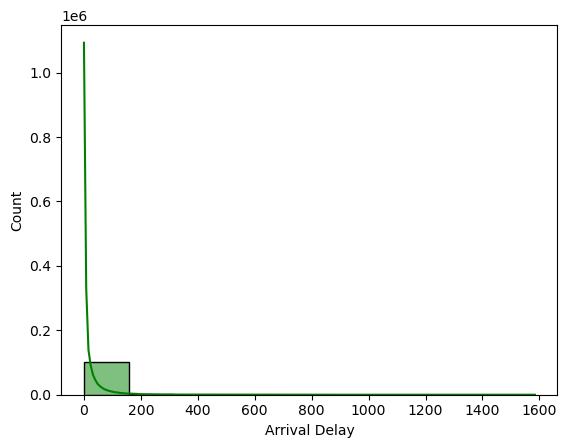

In [27]:
sns.histplot(df1['Arrival Delay'], bins=10, color='green', kde =True)

<AxesSubplot:>

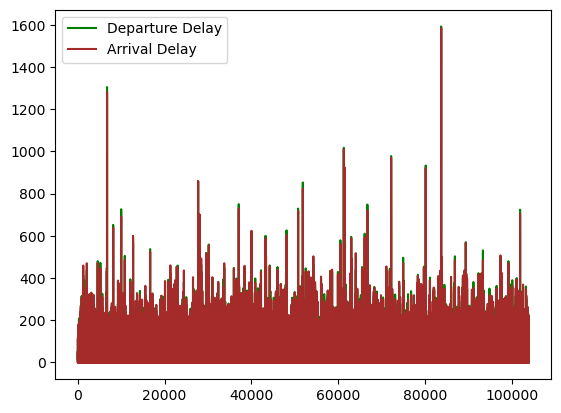

In [28]:
df1[['Departure Delay','Arrival Delay']].plot( color = ['green', 'brown'])

From the graphs above we can see that Departure Delay and Arrival Delay are just about the same. In other words, if a flight is delayed pre departure then it will definitely have an arrival delay as well. Therefore, we will drop Departure Delay from our data and only consider Arrival Delay since having both would be redundant.

In [29]:
df1 = df1.drop(['Departure Delay'], axis=1)
df_test = df_test.drop(['Departure Delay'], axis=1)

In [30]:
df1 = df1.drop(['ew_bin','q_bin'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103594 non-null  object  
 1   Customer Type                      103594 non-null  object  
 2   Age                                103594 non-null  int64   
 3   Type of Travel                     103594 non-null  object  
 4   Class                              103594 non-null  object  
 5   Wifi                               103594 non-null  int64   
 6   Departure/Arrival time convenient  103594 non-null  int64   
 7   Ease of Online booking             103594 non-null  int64   
 8   Gate location                      103594 non-null  int64   
 9   Food and drink                     103594 non-null  int64   
 10  Online boarding                    103594 non-null  int64   
 11  Seat comfort              

In [31]:
df1.groupby('satisfaction')['Arrival Delay'].mean()

satisfaction
neutral or dissatisfied    17.127536
satisfied                  12.630799
Name: Arrival Delay, dtype: float64

In [32]:
#change outliers to upper bound
lower, upper = check_outliers(df1['Arrival Delay'],1.5)
print(f'lower = {lower}, upper={upper}')

lower = -19.5, upper=32.5


In [33]:
#number of outliers
mask_upper = df1['Arrival Delay']>upper
mask_upper.sum()

13954

In [34]:
for i in df1[mask_upper].index:
  df1.loc[i,'Arrival Delay']=upper

In [35]:
#checking if all outliers in Arrival Delay were handled.
new_mask_upper = df1['Arrival Delay']>upper
new_mask_upper.sum()

0

<AxesSubplot:title={'center':'Arrival Delay IQR Plot'}>

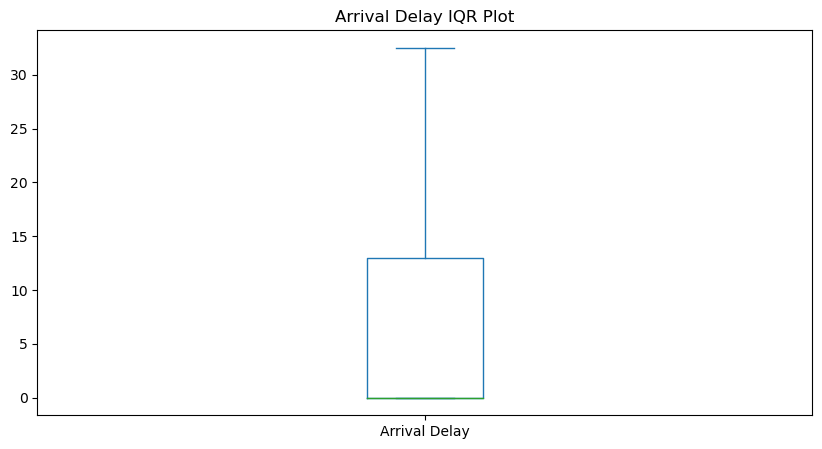

In [36]:
df1[['Arrival Delay']].plot.box(figsize=(10,5), title= "Arrival Delay IQR Plot", whis = 1.5)

### Further Data Exploration

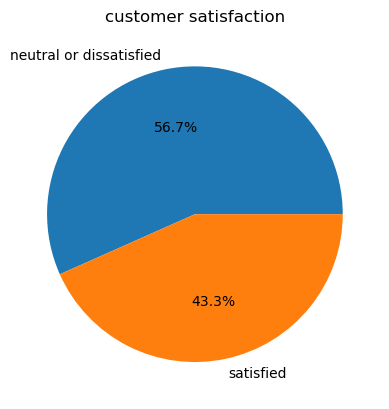

In [37]:
satis_counts = df1['satisfaction'].value_counts()
labels = satis_counts.index
values = satis_counts.values

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('customer satisfaction')
plt.show()

The number of satisfied vs neutral or dissatisfied customers within the dataset is approximately the same. This will be our target variable when we run our models later.

<AxesSubplot:xlabel='Age', ylabel='Count'>

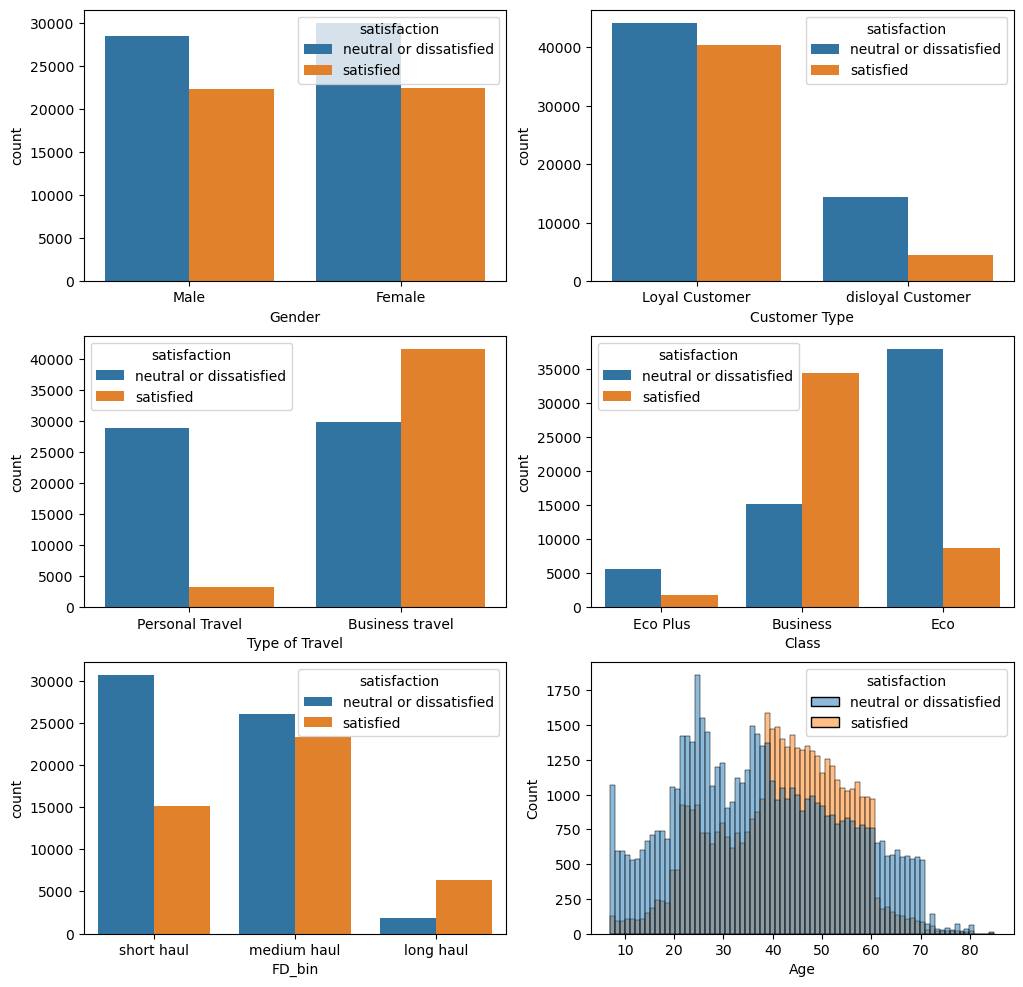

In [38]:
fig, axes = plt.subplots(3, 2, figsize = (12,12))
sns.countplot(data=df1, x='Gender', hue= 'satisfaction', ax = axes[0,0])
sns.countplot(data=df1, x='Customer Type', hue= 'satisfaction', ax = axes[0,1])
sns.countplot(data=df1, x='Type of Travel', hue= 'satisfaction', ax = axes[1,0])
sns.countplot(data=df1, x='Class', hue= 'satisfaction', ax = axes[1,1])
sns.countplot(data=df1, x='FD_bin', hue= 'satisfaction', ax = axes[2,0])
sns.histplot(data=df1, x='Age', hue= 'satisfaction', ax = axes[2,1])

In [39]:
df1.groupby('satisfaction')['Class'].describe()

,count,unique,top,freq
satisfaction,,,,
neutral or dissatisfied,58697,3,Eco,37922
satisfied,44897,3,Business,34390


In [40]:
df1.groupby('Class')['satisfaction'].describe()

,count,unique,top,freq
Class,,,,
Business,49533,2,satisfied,34390
Eco,46593,2,neutral or dissatisfied,37922
Eco Plus,7468,2,neutral or dissatisfied,5632


In [41]:
df1.groupby('FD_bin')['satisfaction'].describe()

,count,unique,top,freq
FD_bin,,,,
short haul,45864,2,neutral or dissatisfied,30723
medium haul,49482,2,neutral or dissatisfied,26109
long haul,8248,2,satisfied,6383


In [42]:
df1.groupby('satisfaction')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
neutral or dissatisfied,58697.0,37.569126,16.459264,7.0,25.0,36.0,50.0,85.0
satisfied,44897.0,41.748558,12.765169,7.0,32.0,43.0,51.0,85.0


In [43]:
df1.groupby('Type of Travel')['satisfaction'].describe()

,count,unique,top,freq
Type of Travel,,,,
Business travel,71465,2,satisfied,41634
Personal Travel,32129,2,neutral or dissatisfied,28866


In [44]:
df1.groupby('Wifi')['satisfaction'].describe()

,count,unique,top,freq
Wifi,,,,
0,3096,2,satisfied,3088
1,17781,2,neutral or dissatisfied,11995
2,25755,2,neutral or dissatisfied,19346
3,25789,2,neutral or dissatisfied,19327
4,19737,2,satisfied,11822
5,11436,2,satisfied,11330


### Key Takeaways
-  There is an even split between male and female customers and they both have about the same proportion of being satisfied vs neutral or unsatisfied
-  Our dataset has many more loyal customers than disloyal customers, meaning the customers in our data are ones that keep using this particular airline
-  The majority of our data comprises of clients who fly for business purposes
-  About half of the data consists of business class flights where about two thirds of those in business class are satisfied
-  The longer the flight the greater satisfaction ratio: long haul > medium haul > short haul (satisfied clients / total clients)
-  The age group of 40-60 is more satisfied whereas every else has higher number of neutral or dissatisfied clients

In [45]:
print(df1.corr())

                                        Age      Wifi  \
Age                                1.000000  0.017470   
Wifi                               0.017470  1.000000   
Departure/Arrival time convenient  0.038038  0.343758   
Ease of Online booking             0.024461  0.715848   
Gate location                     -0.001558  0.336127   
Food and drink                     0.022920  0.134603   
Online boarding                    0.208681  0.457002   
Seat comfort                       0.160302  0.122617   
Inflight entertainment             0.076380  0.209513   
On-board service                   0.057123  0.121484   
Leg Room                           0.040498  0.160485   
Baggage handling                  -0.047619  0.121060   
Checkin service                    0.035003  0.043178   
Inflight service                  -0.049899  0.110626   
Cleanliness                        0.053493  0.132652   
Arrival Delay                     -0.011870 -0.032194   

                              

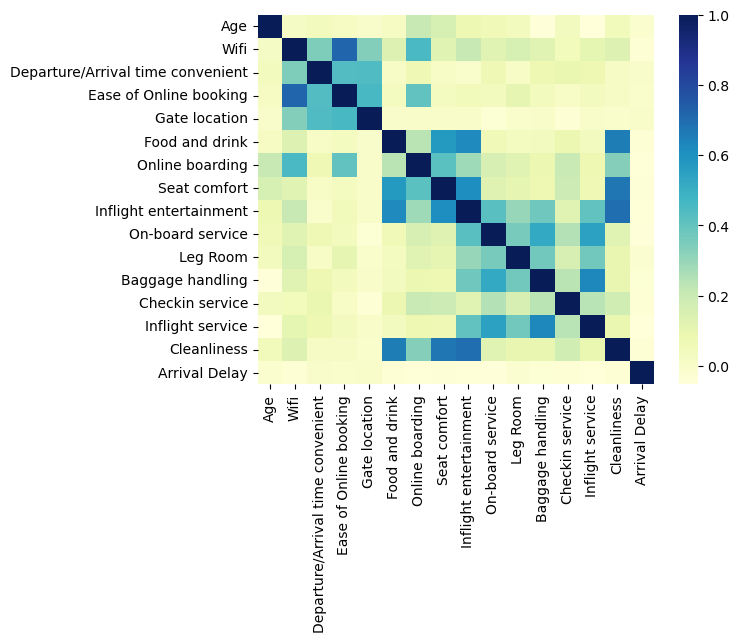

In [46]:
sns.heatmap(df1.corr(), cmap= 'YlGnBu')

plt.show()

# Modelling

### Model Selection

The goal of this data mining project is to find out which features are the most critical in determining a customers satisfaction with their flight. This includes features about the customer themselves, and the flight they took. This can be boiled down to a classification problem where we want to predict whether a customer will be satisfied or neutral/dissatisfied with their trip (binary outcome).

Thus, I am choosing to implemnent 3 different models. The first one being a **Logistic Regression Model**, which will the baseline model for our data set. Then I will be using a **Decision Tree Classifier** and a **Random Forest Classifier**. The reasoning behind using these models is because the latter two easily evaluate variable importance/contribution to the model. Since I am less interested in the actual outcome and most interested in which features lead to the outcome, these models will be able to paint a robust picture of what I am aiming for.

In [47]:
#model packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report

In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             25893 non-null  object  
 1   Customer Type                      25893 non-null  object  
 2   Age                                25893 non-null  int64   
 3   Type of Travel                     25893 non-null  object  
 4   Class                              25893 non-null  object  
 5   Wifi                               25893 non-null  int64   
 6   Departure/Arrival time convenient  25893 non-null  int64   
 7   Ease of Online booking             25893 non-null  int64   
 8   Gate location                      25893 non-null  int64   
 9   Food and drink                     25893 non-null  int64   
 10  Online boarding                    25893 non-null  int64   
 11  Seat comfort                       25893 

## Preprocessing
### Using pd.get_dummies to turn categorical columns to numerical

In [49]:
#preprocessing categorical columns using pd.get_dummies and preperaring both
#training and testing datasets for modelling
train_features = df1.drop(['satisfaction'], axis=1)
X_train = pd.get_dummies(train_features, columns = ['Gender','Customer Type','Type of Travel',
                                                'Class','FD_bin'])
y_train = df1['satisfaction']

test_features = df_test.drop(['satisfaction'], axis=1)
X_test = pd.get_dummies(test_features, columns = ['Gender','Customer Type','Type of Travel',
                                                'Class','FD_bin'])
y_test = df_test['satisfaction']

In [50]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103594 non-null  object  
 1   Customer Type                      103594 non-null  object  
 2   Age                                103594 non-null  int64   
 3   Type of Travel                     103594 non-null  object  
 4   Class                              103594 non-null  object  
 5   Wifi                               103594 non-null  int64   
 6   Departure/Arrival time convenient  103594 non-null  int64   
 7   Ease of Online booking             103594 non-null  int64   
 8   Gate location                      103594 non-null  int64   
 9   Food and drink                     103594 non-null  int64   
 10  Online boarding                    103594 non-null  int64   
 11  Seat comfort              

## LOGISTIC REGRESSION

In [51]:
#LOGISTIC REGRESSION
#using random state 42 for reproducable results

In [52]:
#define model
logreg = LogisticRegression(random_state=42, max_iter = 1000)

#fit model
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

#Accuracy, precision, and recall scores
acc_score = accuracy_score(y_test,y_pred)
print('accuracy:', acc_score)

p0 = precision_score(y_test,y_pred, average="binary", pos_label="neutral or dissatisfied")
print('class 0 precision:', p0)
p1 = precision_score(y_test,y_pred, average="binary", pos_label="satisfied")
print('class 1 precision:', p1)

r0 = recall_score(y_test,y_pred, average="binary", pos_label="neutral or dissatisfied")
print('class 0 recall:', r0)
r1 = recall_score(y_test,y_pred, average="binary", pos_label="satisfied")
print('class 1 recall:', r1)

accuracy: 0.8654848800834203
class 0 precision: 0.8594207614708753
class 1 precision: 0.8743351063829787
class 0 recall: 0.9089344713656388
class 1 recall: 0.8099428068631764


In [53]:
print(classification_report(y_test,y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.86      0.91      0.88     14528
              satisfied       0.87      0.81      0.84     11365

               accuracy                           0.87     25893
              macro avg       0.87      0.86      0.86     25893
           weighted avg       0.87      0.87      0.86     25893



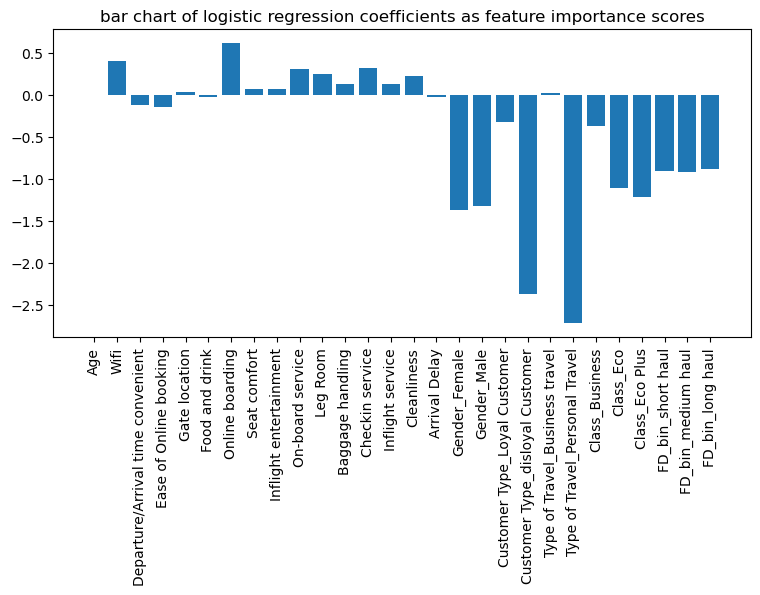

In [54]:
#find out the relative importance of each columns
X_columns = X_test.columns
importance = logreg.coef_[0]
#plotting it:
plt.figure(figsize=(9,4))
plt.bar(X_columns, importance)
plt.xticks(rotation=90)
plt.title('bar chart of logistic regression coefficients as feature importance scores')
plt.show()

#### Features Importance in Logistic Regression

-  Online Boarding is the most important feature for determining which customers are going to be satisfied followed by Wifi
-  Whereas Type of Travel Personal Travel and Customer Type Disloyal Customer are strong indicators for predicting which customers are going to be dissatisfied

## Decision Tree Classifier

In [55]:
#DECISION TREE

dtc = DecisionTreeClassifier(random_state=42)

dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

acc_score = accuracy_score(y_test,y_pred_dtc)
print('accuracy_score:', acc_score)

p0 = precision_score(y_test,y_pred_dtc, average="binary", pos_label="neutral or dissatisfied")
print('class 0 precision:', p0)
p1 = precision_score(y_test,y_pred_dtc, average="binary", pos_label="satisfied")
print('class 1 precision:', p1)

r0 = recall_score(y_test,y_pred_dtc, average="binary", pos_label="neutral or dissatisfied")
print('class 0 recall:', r0)
r1 = recall_score(y_test,y_pred_dtc, average="binary", pos_label="satisfied")
print('class 1 recall:', r1)

accuracy_score: 0.947707874715174
class 0 precision: 0.9550290135396519
class 1 precision: 0.9384251554699133
class 0 recall: 0.9516106828193832
class 1 recall: 0.9427188737351517


In [56]:
print(classification_report(y_test,y_pred_dtc))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.95      0.95     14528
              satisfied       0.94      0.94      0.94     11365

               accuracy                           0.95     25893
              macro avg       0.95      0.95      0.95     25893
           weighted avg       0.95      0.95      0.95     25893



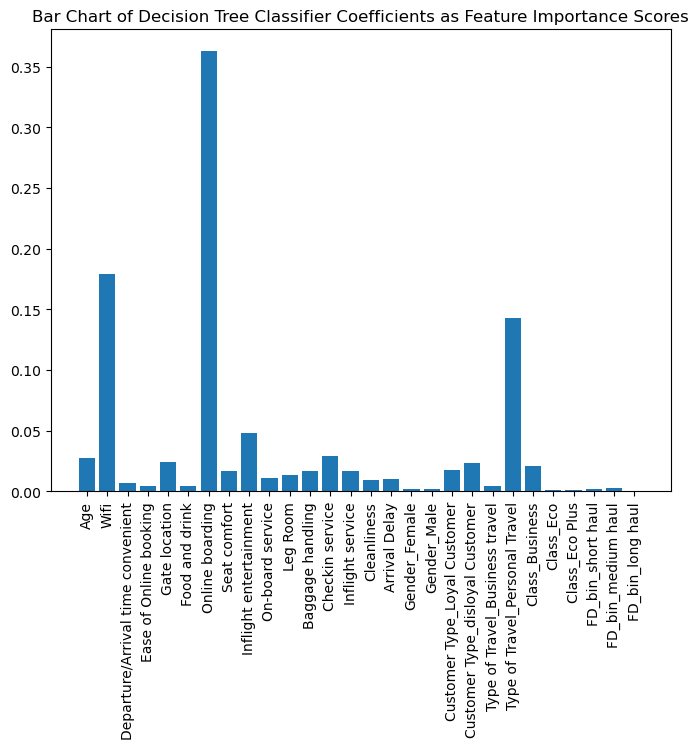

In [57]:
importance = dtc.feature_importances_

# plot feature importance
plt.figure(figsize=(8,6))
plt.bar(X_columns, importance)
plt.title('Bar Chart of Decision Tree Classifier Coefficients as Feature Importance Scores')
plt.xticks(rotation=90)
plt.show()

#### Features Importance in Decision Tree Classifier

-  Online boarding and Wifi are again the top two features of importance
-  However, with this model we can also see the importance of the Type of Travel, specifically that type being of value Personal Travel

## RANDOM FOREST CLASSIFIER

In [58]:
#RANDOM FOREST CLASSIFIER
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

#accuracy, precison and recall score
acc_score = accuracy_score(y_test,y_pred_rfc)
print('accuracy_score:', acc_score)

p0 = precision_score(y_test,y_pred_rfc, average="binary", pos_label="neutral or dissatisfied")
print('class 0 precision:', p0)
p1 = precision_score(y_test,y_pred_rfc, average="binary", pos_label="satisfied")
print('class 1 precision:', p1)

r0 = recall_score(y_test,y_pred_rfc, average="binary", pos_label="neutral or dissatisfied")
print('class 0 recall:', r0)
r1 = recall_score(y_test,y_pred_rfc, average="binary", pos_label="satisfied")
print('class 1 recall:', r1)

accuracy_score: 0.9633491677287298
class 0 precision: 0.9561916280319828
class 1 precision: 0.9730245231607629
class 0 recall: 0.979556718061674
class 1 recall: 0.9426308842938848


In [59]:
print(classification_report(y_test,y_pred_rfc))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14528
              satisfied       0.97      0.94      0.96     11365

               accuracy                           0.96     25893
              macro avg       0.96      0.96      0.96     25893
           weighted avg       0.96      0.96      0.96     25893



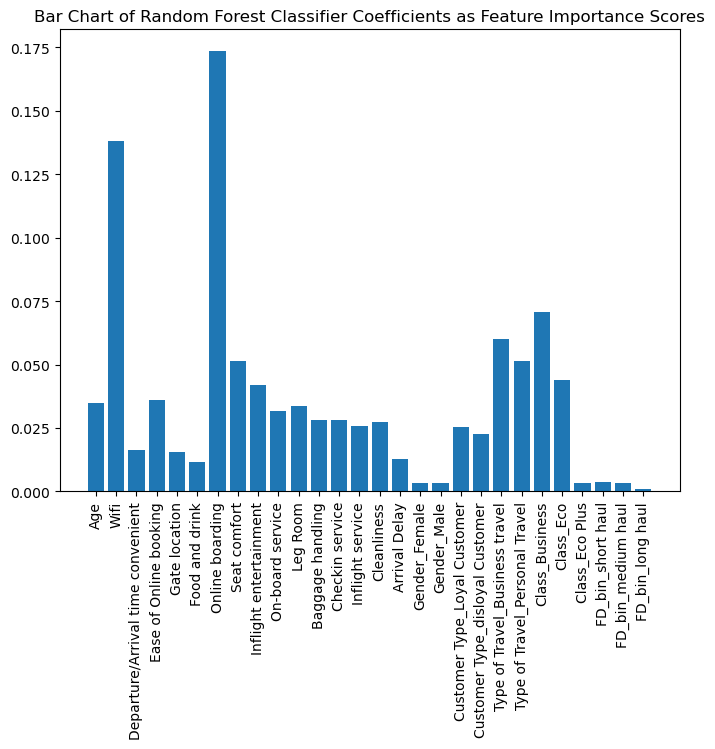

In [60]:
importance = rfc.feature_importances_

# plot feature importance
plt.figure(figsize=(8,6))
plt.bar(X_columns, importance)
plt.xticks(rotation=90)
plt.title('Bar Chart of Random Forest Classifier Coefficients as Feature Importance Scores')
plt.show()

#### Features Importance in Logistic Regression

-  Again, Online Boarding and Wifi are clearly the top 2 features
-  We can also see that both the Type of Travel and Class Business play an important role in predicting satisfaction
-  Closely following those we also have seat comfort

### Insights, Conclusions, and Future Improvements

From the models we can see that the Random Forest Classifier has the highest accuracy, precision and recall score. I would thus suggest that for our purposes of trying to find out which features are of utmost importance for a customers satisfaction that we use the Random Forest Classifier as our main model.

I'd suggest the airline to focus on providing the best experience when in checking in online/in advance through the web. The development of an easy to use app would be critical in the world we live in today and would be the primary driver behind customer satisfaction. Secondly, I would suggest offering some sort of wifi support on all aircrafts if possible. Whether it be free or paid wifi as this dataset does not make a distinction between the two. Thidly, the logistic regression model tells us the importance of customer loyalty. Customers who are "disloyal" are more likely to be neutral or unsatisfied and thus an airline should look for additional ways to attract those customers to their loyalty program.

Additionally, I'd suggest looking into gathering more data about the differences between business and economy that sway customers satisfaction. Is it customer service? Is it seat comfort? This dataset doesn't paint a clear enough picture of where an airline could improve in bridging the gap of customer satisfaction between personal vs business travel and between business vs eco class.

In terms of improvements that can be done, I would consider implementing dimensionality reduction in the data pre-processing step. This path would allow us to really focus on the features of importance because, as we have seen, many of the independent variables did not play a significant part in any of our models. For example, Gender, Flight Distance, Delays, etc. This would allow us to better fine tune our models and really only focus on the features that matter in determining a customers satisfaction.